In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('amazon_prime_titles.csv')

In [64]:
df1=df.copy()
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [65]:
df1.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1249,s1250,TV Show,Psych,NaN,"James Roday, Dule Hill, Corbin Bernsen, Maggie...",NaN,NaN,2014,TV-PG,8 Seasons,"Comedy, Suspense","""Psych,"" USA's longest-running series, returns..."
7062,s7063,Movie,Blood Brother,John Pogue,"Trey Songz, Jack Kesy, China Anne McClain, Lin...",NaN,NaN,2018,R,85 min,"Drama, Suspense",Jake goes to prison to protect his friends and...
6682,s6683,Movie,Natasha Pearl Hansen: I was Supposed to Get Ma...,Jonathan Talbert,"Natasha Pearl Hansen, Jake Snell, Carmen Hanse...",NaN,NaN,2021,18+,53 min,"Arts, Entertainment, and Culture, Comedy, Spec...",After postponing her wedding for the third tim...
2720,s2721,TV Show,Daniel Tiger's Neighborhood,NaN,"Jake Beale, Heather Bambrick, Ted Dykstra",NaN,NaN,2012,TV-Y,1 Season,Kids,"The first TV series inspired by the iconic, aw..."
7256,s7257,Movie,Kadavul Paathi Mirugam Paathi,Raaj Zacharias Suresh,"Raj Zacharias, Sethu, Abhishek Vinod, Swetha V...",NaN,NaN,2015,13+,90 min,"Action, Suspense","Jai and Neha, eloping to Hyderabad to get marr..."


In [66]:
df1.shape

(9668, 12)

In [67]:
df1.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [69]:
df1.isna().sum().sum()

22162

In [70]:
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [71]:
df1.drop(['show_id'],axis=1,inplace=True)
df1.drop(['description'],axis=1,inplace=True)

In [72]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [73]:
df1.duplicated().sum()

0

In [74]:
df1.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [76]:
df1.isna().sum()

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

In [77]:
#filling null values
df1['director'].fillna('unavilable',inplace=True)
df1['cast'].fillna('unavilable',inplace=True)
df1['country'].fillna('unavilable',inplace=True)
df1['date_added']=df1['date_added'].ffill()
df1['rating']=df1['rating'].fillna(df1['rating'].mode()[0])

In [78]:
df1.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [79]:
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [80]:
df1['date_added']=pd.to_datetime(df1['date_added'],errors='coerce')

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [82]:
# top 10 director with most directed movie
filtered_directors=df1[df1['director']!='unavilable']
filtered_directors

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"
...,...,...,...,...,...,...,...,...,...,...
9660,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",unavilable,2021-10-10,2021,13+,96 min,Comedy
9662,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",unavilable,2021-10-10,2021,16+,93 min,"Drama, Science Fiction, Suspense"
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",unavilable,2021-10-10,1940,7+,60 min,Comedy
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",unavilable,2021-10-10,2008,R,90 min,Action


In [83]:
top_directors=filtered_directors['director'].value_counts()
top_directors

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
J. Sabarish                1
Steve Barker               1
Name: count, Length: 5773, dtype: int64

In [84]:
top_directors=filtered_directors['director'].value_counts().head(10)
top_directors

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

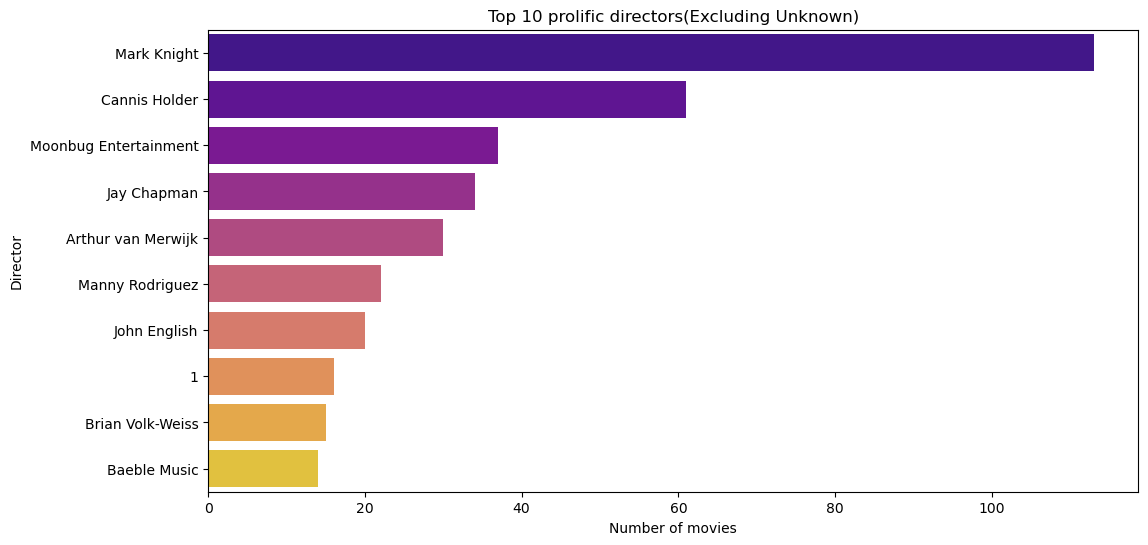

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values,y=top_directors.index,palette='plasma')
plt.title('Top 10 prolific directors(Excluding Unknown)')
plt.xlabel('Number of movies')
plt.ylabel('Director')
plt.show()

In [86]:



filtered_actors=df1[df1['cast']!='unavilable']

top_actors=filtered_actors['cast'].value_counts().head(10)


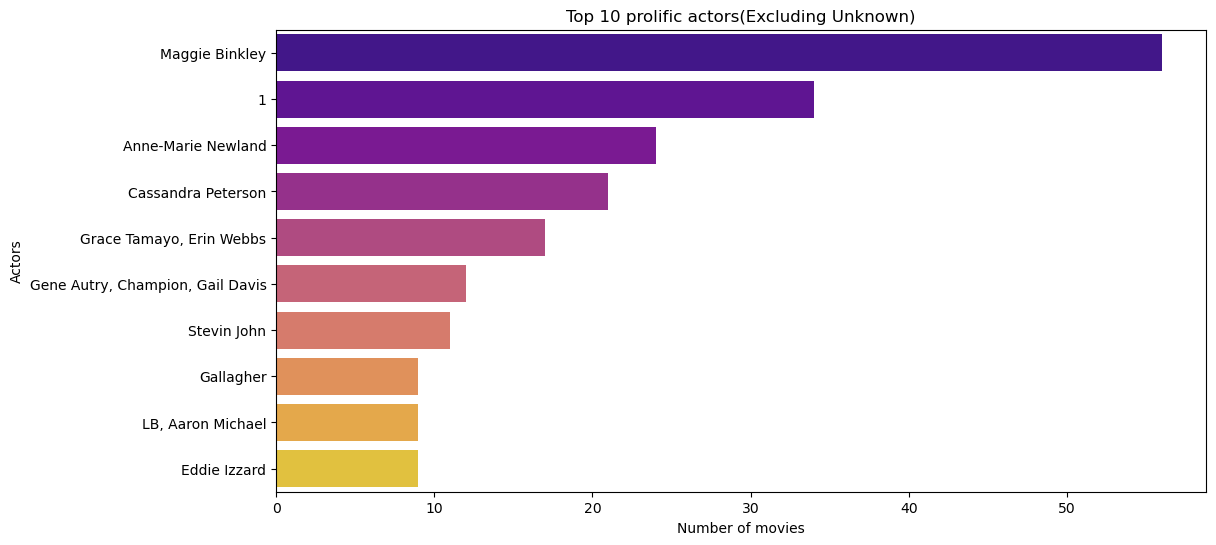

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_actors.values,y=top_actors.index,palette='plasma')
plt.title('Top 10 prolific actors(Excluding Unknown)')
plt.xlabel('Number of movies')
plt.ylabel('Actors')
plt.show()

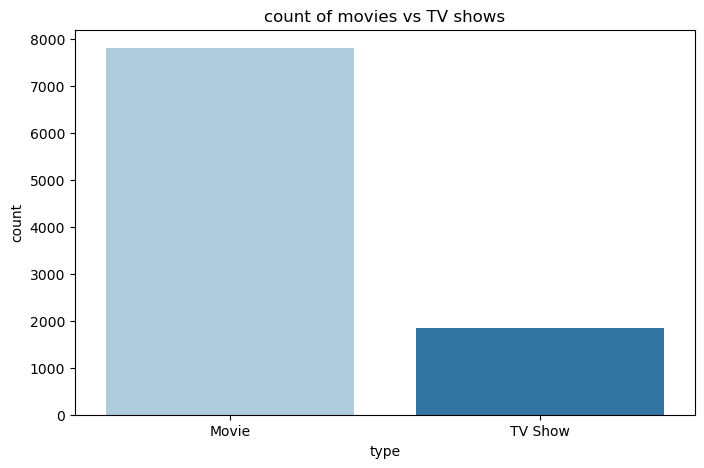

In [112]:
# count of each content type(movie vs tv show)
plt.figure(figsize=(8,5))
sns.countplot(data=df1,x='type',palette='Paired')
plt.title('count of movies vs TV shows')
plt.show()

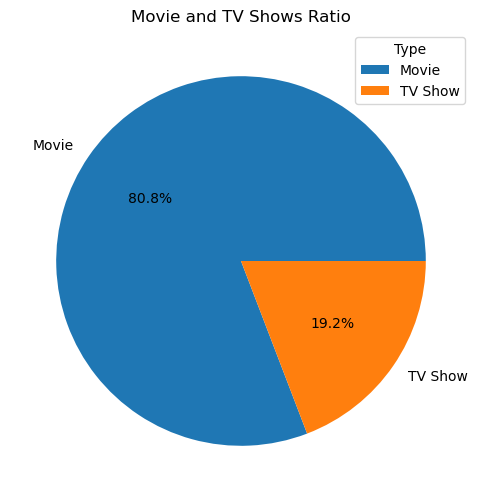

In [110]:
df1_pie = df1['type'].value_counts()  # Get the count of each category in 'type'
plt.figure(figsize=(6, 6))
plt.pie(x=df1_pie.values, labels=df1_pie.index, autopct='%.1f%%')  # Corrected `autopct`
plt.title('Movie and TV Shows Ratio')
plt.legend(title="Type")  # Adding a legend with a title
plt.show()


<Axes: xlabel='rating', ylabel='count'>

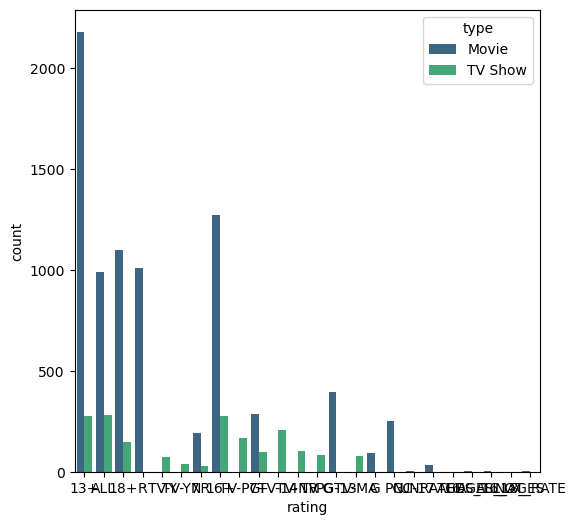

In [90]:
plt.figure(figsize=(6,6))
sns.countplot(x=df1['rating'],data=df1,hue='type',palette='viridis')

In [91]:

filtered_country=df1[df1['country']!='unavilable']

country_counts=filtered_country['country'].value_counts().head(10)

In [92]:
top_countries=country_counts.nlargest(3).index
top_countries

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

In [93]:
#filtering the DataFrame to include only the top3 countries
df_top_countries=filtered_country[filtered_country['country'].isin(top_countries)]
df_top_countries

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"
5,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,2021-03-30,1989,13+,52 min,"Fantasy, Kids"
...,...,...,...,...,...,...,...,...,...,...
9604,Movie,Bride Wars,Gary Winick,"Kate Hudson, Anne Hathaway, Kristen Johnston, ...",United States,2021-10-08,2009,PG,89 min,Comedy
9614,Movie,What Happens in Vegas,Tom Vaughan,"Cameron Diaz, Ashton Kutcher, Rob Corddry, ...",United States,2021-10-08,2008,PG-13,99 min,Comedy
9641,Movie,Marley & Me,David Frankel,"Owen Wilson, Jennifer Aniston",United States,2021-10-10,2008,PG,116 min,"Comedy, Drama, Kids"
9643,Movie,Love & Other Drugs,Edward Zwick,"K K, Jake Gyllenhaal, Anne Hathaway, Oliver Pl...",United States,2021-10-10,2010,R,112 min,"Comedy, Drama"


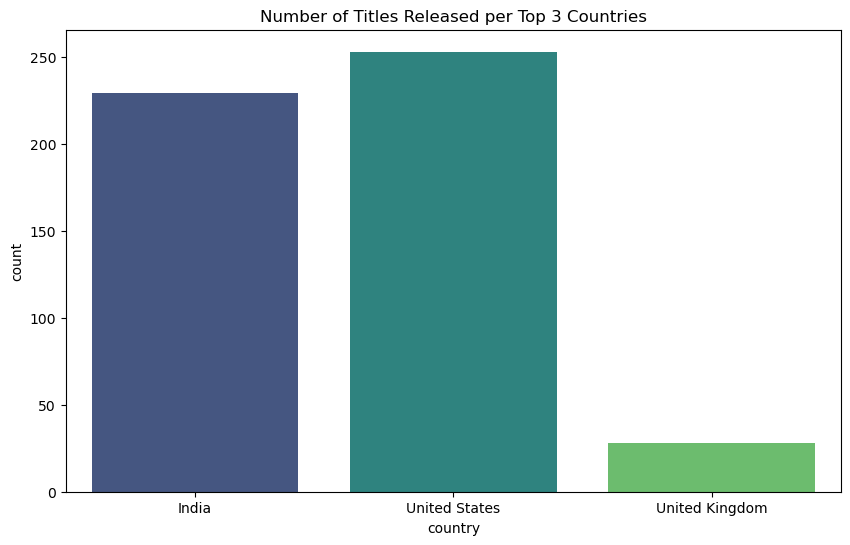

In [94]:
# plotting the number of tittles released per top 3 countries
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_countries,x='country',palette='viridis')
plt.title('Number of Titles Released per Top 3 Countries')
plt.show()

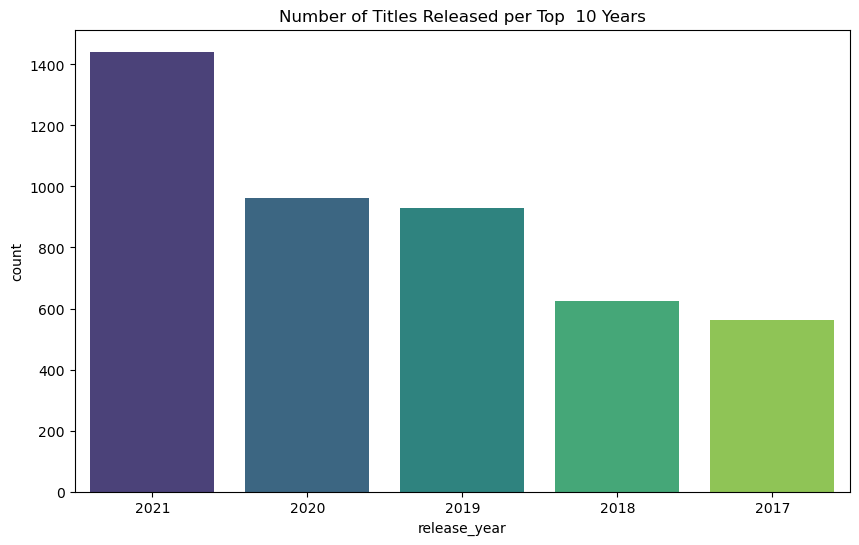

In [95]:
year_counts=df['release_year'].value_counts()
#getting the top  release year
top_years=year_counts.nlargest().index
#filtering the DF to include only the top  years
df_top_years=df1[df1['release_year'].isin(top_years)]
#plottimg the number of tittles released per top  years
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',palette='viridis',order=top_years)
plt.title('Number of Titles Released per Top  10 Years')
plt.show()

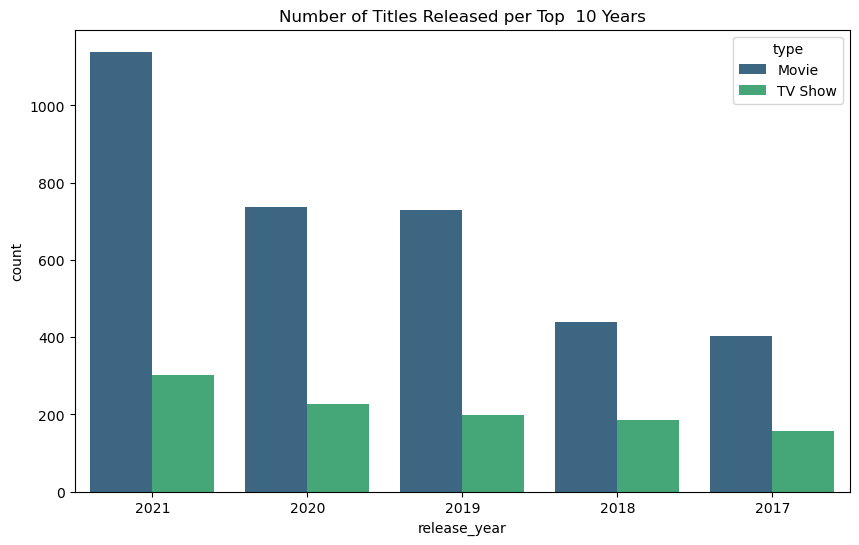

In [96]:
year_counts=df['release_year'].value_counts()
#getting the top  release year
top_years=year_counts.nlargest().index
#filtering the DF to include only the top  years
df_top_years=df1[df1['release_year'].isin(top_years)]
#plottimg the number of tittles released per top  years
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years,x='release_year',hue='type',palette='viridis',order=top_years)
plt.title('Number of Titles Released per Top  10 Years')
plt.show()

In [97]:
#Distribution of genres
df1['Genres']=df1['listed_in'].apply(lambda x:x.split(', '))


In [98]:
df1['Genres']

0                 [Comedy, Drama]
1          [Drama, International]
2       [Action, Drama, Suspense]
3                   [Documentary]
4                [Drama, Fantasy]
                  ...            
9663                     [Comedy]
9664                   [TV Shows]
9665                     [Action]
9666              [Drama, Sports]
9667    [Action, Drama, Suspense]
Name: Genres, Length: 9668, dtype: object

In [99]:
# Exploring the genres in to seperate rows
genres_exploded=df1.explode('Genres')

In [100]:
genres_exploded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Genres
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama",Comedy
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama",Drama
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",Drama
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International",International
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense",Action
...,...,...,...,...,...,...,...,...,...,...,...
9666,TV Show,Maradona: Blessed Dream,unavilable,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",unavilable,2021-10-10,2021,TV-MA,1 Season,"Drama, Sports",Drama
9666,TV Show,Maradona: Blessed Dream,unavilable,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",unavilable,2021-10-10,2021,TV-MA,1 Season,"Drama, Sports",Sports
9667,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",unavilable,2021-10-10,2010,R,103 min,"Action, Drama, Suspense",Action
9667,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",unavilable,2021-10-10,2010,R,103 min,"Action, Drama, Suspense",Drama


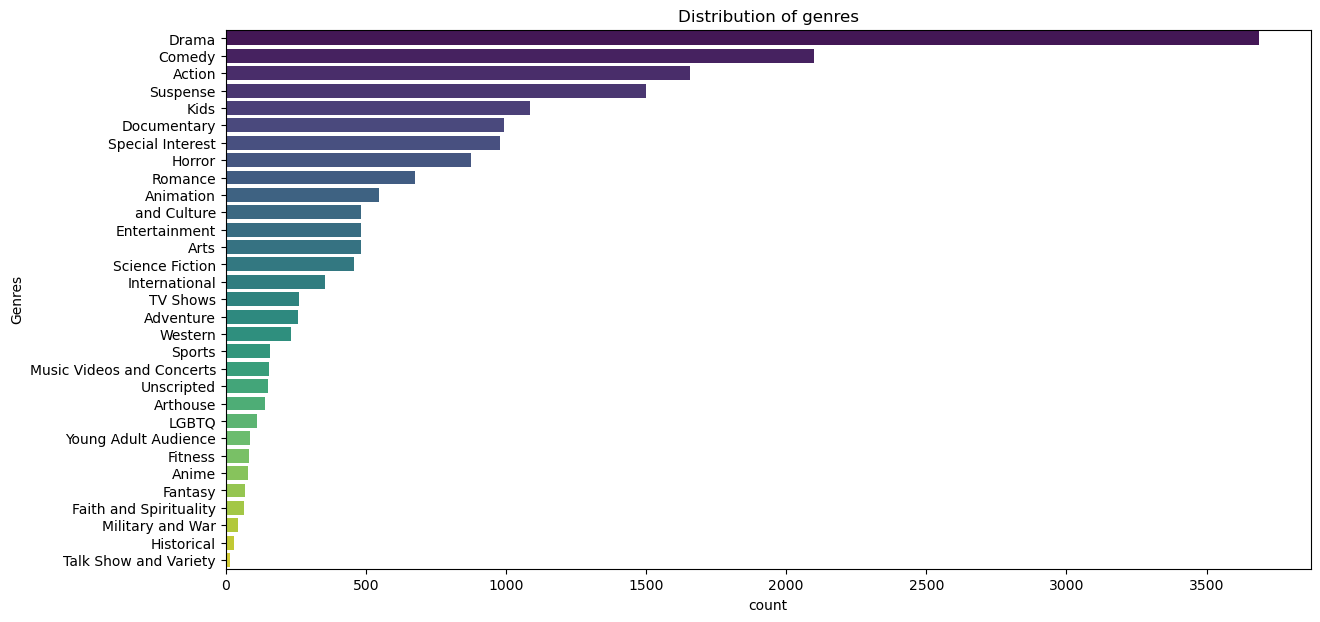

In [101]:
plt.figure(figsize=(14,7))
sns.countplot(data=genres_exploded,y='Genres',palette='viridis',order=genres_exploded['Genres'].value_counts().index)
plt.title('Distribution of genres')
plt.show()

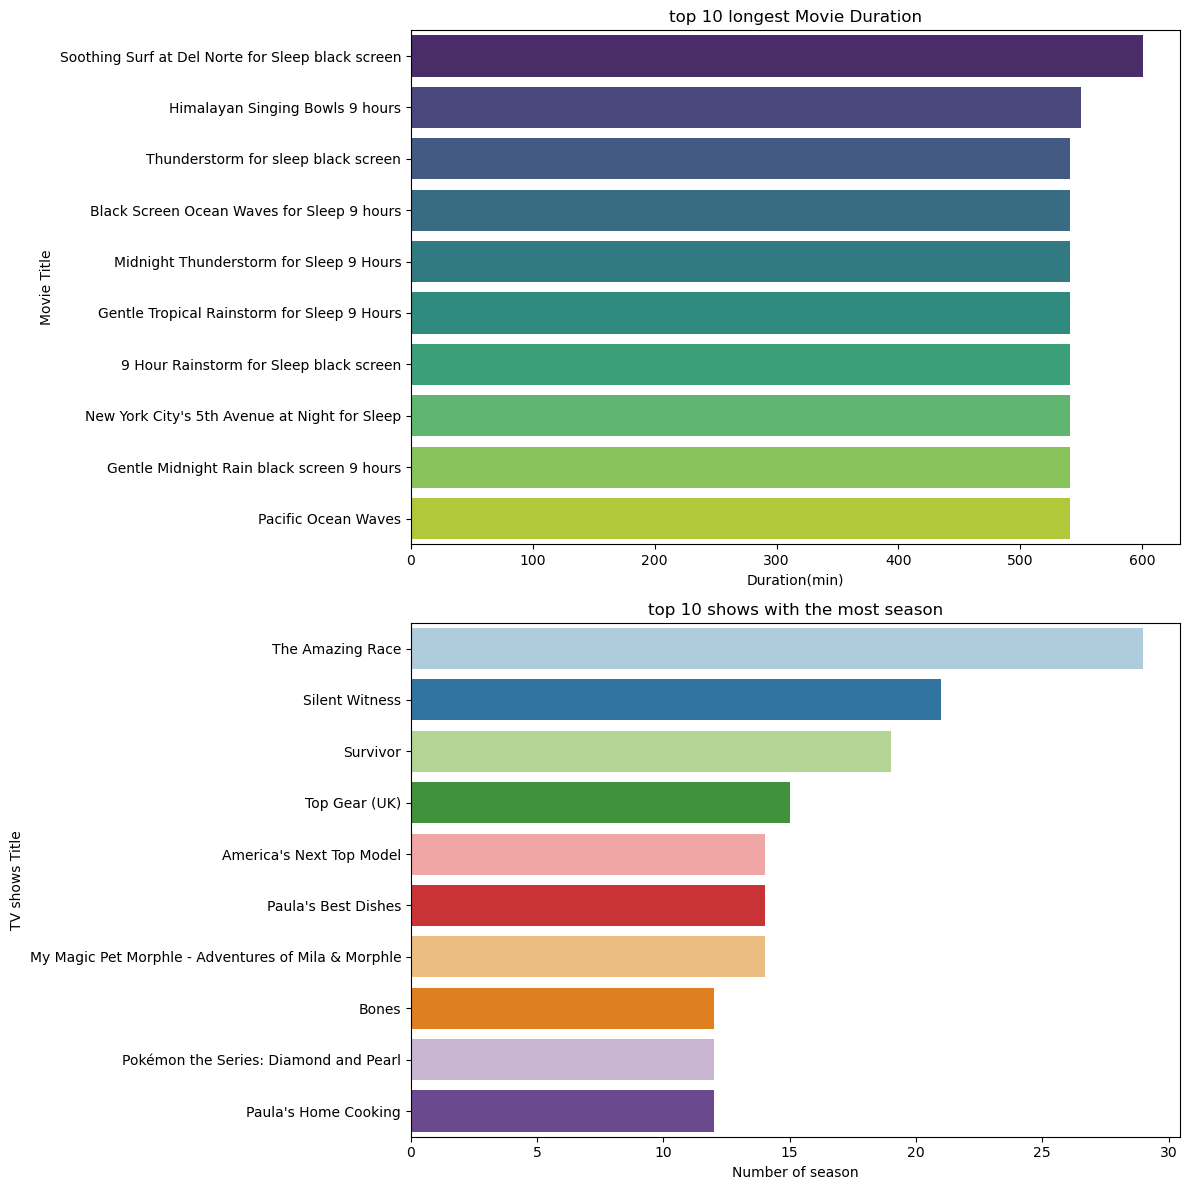

In [108]:
# Filter data for movies and TV shows separately
df1_movies=df1[df1['type']=='Movie'].copy()
df1_tV_shows=df1[df1['type']=='TV Show'].copy()
# Extract numeric duration for movies
df1_movies['duration_num']=df1_movies['duration'].str.extract('(\d+)',expand=False).astype(float)
# Extract numeric duration for  TV Shows
df1_tV_shows['duration_num']=df1_tV_shows['duration'].str.extract('(\d+)',expand=False).astype(float)
#plotting
plt.figure(figsize=(12,12))
#subplot 1:Top10 Longest Movie Duration
plt.subplot(2,1,1)
sns.barplot(data=df1_movies.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',orient='horizontal',palette='viridis')
plt.title('top 10 longest Movie Duration')
plt.xlabel('Duration(min)')
plt.ylabel('Movie Title')
plt.subplot(2,1,2)
sns.barplot(data=df1_tV_shows.sort_values(by='duration_num',ascending=False).head(10),y='title',x='duration_num',orient='horizontal',palette='Paired')
plt.title('top 10 shows with the most season')
plt.xlabel('Number of season')
plt.ylabel('TV shows Title')
plt.tight_layout()
plt.show()

# word cloud

In [117]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

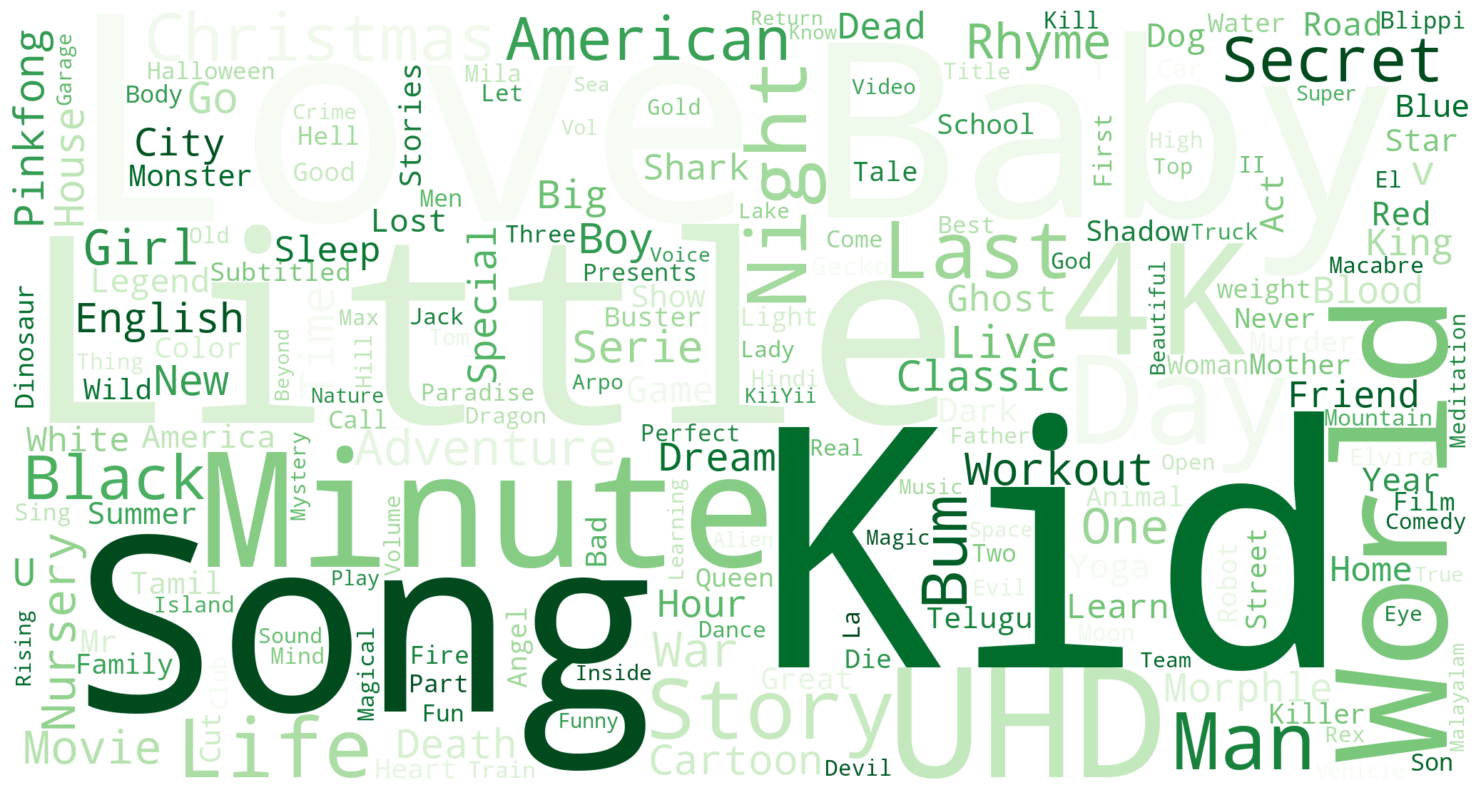

In [124]:
txt1 = " ".join(title for title in df1.title)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='Greens_r').generate(txt1)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

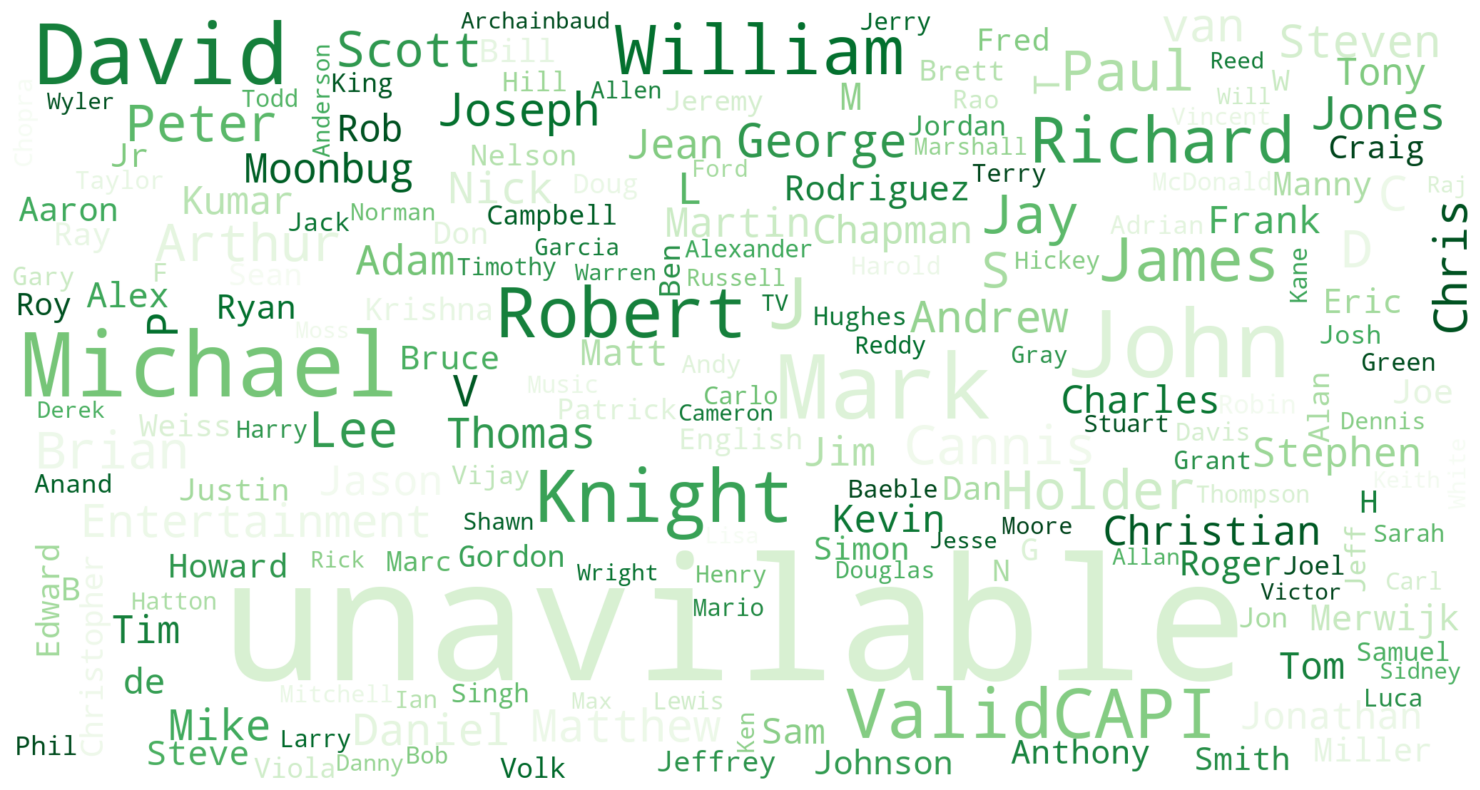

In [125]:
txt1 = " ".join(title for title in df1.director)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='Greens_r').generate(txt1)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()